In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy.optimize
from matplotlib import pyplot as plt

import cavity_qed_systems
import pulse
import cmps_utils
import tncontract as tn
import parameterized_pulse as ppulse

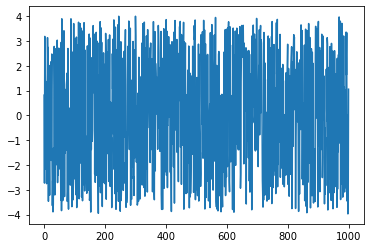

In [3]:
state = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0], 1.0, 1.0)
delta = ppulse.DirectParameterizedPulse(10, 1000, [-4, 4])
plt.plot(delta.state())

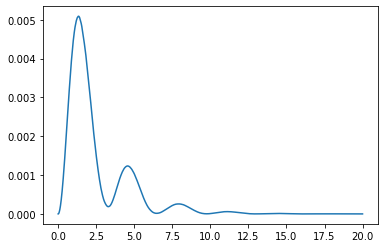

In [4]:
mps = state.get_mps([delta])
single_ph_proj = cmps_utils.compute_single_ph_proj(mps)
plt.plot(state.times, np.abs(single_ph_proj)**2)

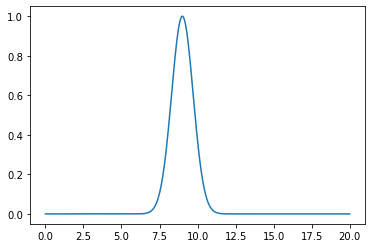

In [5]:
target_photon_pulse = pulse.GaussianPulse(1.0, 9.0, 1.0)
target_mps = cmps_utils.single_ph_state_as_mps(
    target_photon_pulse(state.times), bond_dim=state.sys_dim)

plt.plot(state.times, target_photon_pulse(state.times))

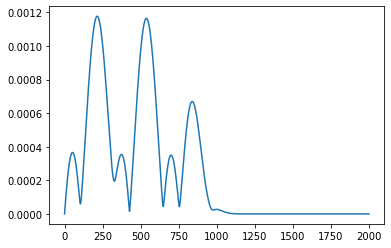

In [87]:
# Compute the gradient with respect to the pulse.
grad = state.get_inner_prod_gradient(
    target_mps, [delta])
plt.plot(np.abs(grad[0]))

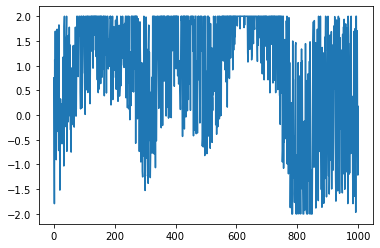

In [69]:
plt.plot(delta.state())

In [6]:
def optimize_overlap(state, target_mps, pulse):
    """Right now we assume that there is only one pulse."""
    def _obj_fun(x):
        pulse.update(x)
        olap = np.abs(state.get_inner_product(target_mps, [pulse]))**2
        print("Current overlap = ", olap)
        return -olap
    
    def _gradient(x):
        pulse.update(x)
        inner_prod = state.get_inner_product(target_mps, [pulse])
        grad_inner_prod = state.get_inner_prod_gradient(
            target_mps, [pulse])[0]
        grad = -2 * pulse.get_gradient(state.times) @ np.real(
            grad_inner_prod * np.conj(inner_prod))
        print(np.shape(grad))
        return grad.astype(float)

    print(pulse.bounds())
    print(np.shape(pulse.state()))
    scipy.optimize.minimize(
        _obj_fun, pulse.state(), bounds=pulse.bounds(),jac=_gradient, method="L-BFGS-B") # jac=_gradient,

In [102]:
optimize_overlap(state, target_mps, delta)

[[-4.  4.]
 [-4.  4.]
 [-4.  4.]
 ...
 [-4.  4.]
 [-4.  4.]
 [-4.  4.]]
(1001,)
Current overlap =  0.013575896762323555
(1001,)


<ipython-input-101-07e912fdd085>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.013576760630417031
(1001,)
Current overlap =  0.017600539964695218
(1001,)
Current overlap =  0.019904746503797748
(1001,)
Current overlap =  0.028445258120022448
(1001,)
Current overlap =  0.03901853768490281
(1001,)
Current overlap =  0.051920978525646914
(1001,)
Current overlap =  0.0968267383262754
(1001,)
Current overlap =  0.16439991318971958
(1001,)
Current overlap =  0.2814527735883344
(1001,)
Current overlap =  0.3491578203901302
(1001,)
Current overlap =  0.40835974322576696
(1001,)
Current overlap =  0.4501223530959823
(1001,)
Current overlap =  0.4784035084173832
(1001,)
Current overlap =  0.49772586167596267
(1001,)
Current overlap =  0.5074709299583761
(1001,)
Current overlap =  0.5139518058191035
(1001,)
Current overlap =  0.5197028388501685
(1001,)
Current overlap =  0.5250810486325296
(1001,)
Current overlap =  0.528283376130449
(1001,)
Current overlap =  0.5301440906170194
(1001,)
Current overlap =  0.5371081202430942
(1001,)
Current overlap =  0.

KeyboardInterrupt: 

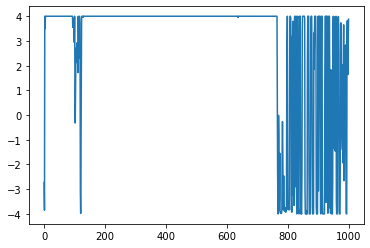

In [103]:
plt.plot(delta.state())

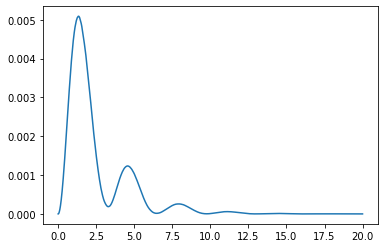

In [7]:
mps = state.get_mps([delta])
single_ph_proj = cmps_utils.compute_single_ph_proj(mps)
plt.plot(state.times, np.abs(single_ph_proj)**2)

In [8]:
targetState = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], 1.0, 1.0)
targetMPS = targetState.get_mps([pulse.ConstantPulse(0)])

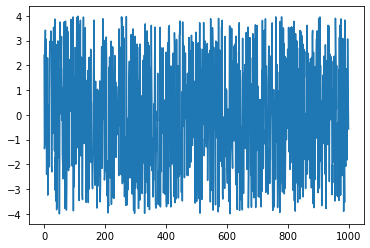

In [9]:
state = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [-0.5,0.5], 0.001, 1.0)
delta = ppulse.DirectParameterizedPulse(20, 2000, [-2, 2])
plt.plot(delta.state())

In [10]:
optimize_overlap(state, targetMPS, delta)

[[-4.  4.]
 [-4.  4.]
 [-4.  4.]
 ...
 [-4.  4.]
 [-4.  4.]
 [-4.  4.]]
(1001,)
Current overlap =  0.5506752624730117
(1001,)


<ipython-input-6-07e912fdd085>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.5510911071970066
(1001,)
Current overlap =  0.6291337356498595
(1001,)
Current overlap =  0.6451645070571946
(1001,)
Current overlap =  0.6801859613623356
(1001,)
Current overlap =  0.7051493897663996
(1001,)
Current overlap =  0.7143809281996462
(1001,)
Current overlap =  0.771836558610538
(1001,)
Current overlap =  0.8118852561801643
(1001,)
Current overlap =  0.8330634796396512
(1001,)
Current overlap =  0.8468816270746129
(1001,)
Current overlap =  0.8732699197569277
(1001,)
Current overlap =  0.8861449949472113
(1001,)
Current overlap =  0.9006330395537272
(1001,)
Current overlap =  0.9069011924196193
(1001,)
Current overlap =  0.9186039335924527
(1001,)
Current overlap =  0.9307281815122638
(1001,)
Current overlap =  0.9373584572682497
(1001,)
Current overlap =  0.9435484435135866
(1001,)
Current overlap =  0.943257328911407
(1001,)
Current overlap =  0.9432270086102807
(1001,)
Current overlap =  0.9434741198695477
(1001,)
Current overlap =  0.943533674899955

(1001,)
Current overlap =  0.944038774611455
(1001,)
Current overlap =  0.9440387746115589
(1001,)
Current overlap =  0.9440387746115809
(1001,)
Current overlap =  0.9440387746115843
(1001,)
Current overlap =  0.9440387746115814
(1001,)
Current overlap =  0.9440408524786088
(1001,)
Current overlap =  0.9440490607756934
(1001,)
Current overlap =  0.9440802430196082
(1001,)
Current overlap =  0.9440855446610831
(1001,)
Current overlap =  0.9340373498588272
(1001,)
Current overlap =  0.9420940858813873
(1001,)
Current overlap =  0.9437081061022606
(1001,)
Current overlap =  0.9440151464461838
(1001,)
Current overlap =  0.9440724581960485
(1001,)
Current overlap =  0.9440831135383799
(1001,)
Current overlap =  0.944085093075673
(1001,)
Current overlap =  0.9440854607801296
(1001,)
Current overlap =  0.9440855290804534
(1001,)
Current overlap =  0.9440855417670297
(1001,)
Current overlap =  0.9440855441235221
(1001,)
Current overlap =  0.9440855445612314
(1001,)
Current overlap =  0.9440855

KeyboardInterrupt: 

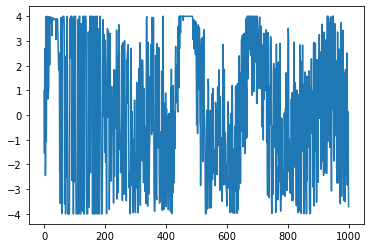

In [120]:
plt.plot(delta.state())

In [122]:
delta2 = ppulse.DirectParameterizedPulse(10, 1000, [-1, 1])
optimize_overlap(state, targetMPS, delta2)

[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(1001,)
Current overlap =  0.39652027951401037
(1001,)


<ipython-input-101-07e912fdd085>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.3974396260252342
(1001,)
Current overlap =  0.5309269202406162
(1001,)
Current overlap =  0.5865550190426139
(1001,)
Current overlap =  0.5936646487956942
(1001,)
Current overlap =  0.6141770633681541
(1001,)
Current overlap =  0.630615812984566
(1001,)
Current overlap =  0.6398430371012547
(1001,)
Current overlap =  0.6499073578313062
(1001,)
Current overlap =  0.6594067762544213
(1001,)
Current overlap =  0.662374668846639
(1001,)
Current overlap =  0.6642482613479095
(1001,)
Current overlap =  0.6660137170653794
(1001,)
Current overlap =  0.6668666619359929
(1001,)
Current overlap =  0.669395873098071
(1001,)
Current overlap =  0.6699748529126145
(1001,)
Current overlap =  0.6705181628090806
(1001,)
Current overlap =  0.6711914099506013
(1001,)
Current overlap =  0.6716393528126524
(1001,)
Current overlap =  0.6719998774537528
(1001,)
Current overlap =  0.6722832816483401
(1001,)
Current overlap =  0.6724957336063305
(1001,)
Current overlap =  0.6734194623823325

KeyboardInterrupt: 

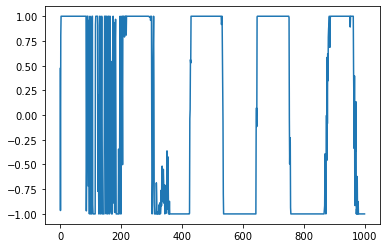

In [124]:
plt.plot(delta2.state())

[[-4.  4.]
 [-4.  4.]
 [-4.  4.]
 ...
 [-4.  4.]
 [-4.  4.]
 [-4.  4.]]
(1001,)
Current overlap =  0.015161161597848152
(1001,)


<ipython-input-101-07e912fdd085>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.015187650074445324
(1001,)
Current overlap =  0.01521417932772155
(1001,)
Current overlap =  0.015320501255464991
(1001,)
Current overlap =  0.015471981675172337
(1001,)
Current overlap =  0.015498902894398748
(1001,)
Current overlap =  0.015606794425998154
(1001,)
Current overlap =  0.016041654210008374
(1001,)
Current overlap =  0.0178329602170558
(1001,)
Current overlap =  0.01789442657499863
(1001,)
Current overlap =  0.01792459809491452
(1001,)
Current overlap =  0.018045502701904484
(1001,)
Current overlap =  0.018532601940172134
(1001,)
Current overlap =  0.020191179447387186
(1001,)
Current overlap =  0.020224512242228758
(1001,)
Current overlap =  0.020353487086249553
(1001,)
Current overlap =  0.020386960881179177
(1001,)
Current overlap =  0.020420442393528224
(1001,)
Current overlap =  0.020554597945411472
(1001,)
Current overlap =  0.020714024799563555
(1001,)
Current overlap =  0.02074794901007696
(1001,)
Current overlap =  0.020883876882200423
(1001,

(1001,)
Current overlap =  0.1580467662685415
(1001,)
Current overlap =  0.15812525052178306
(1001,)
Current overlap =  0.15843925144930351
(1001,)
Current overlap =  0.15969624174380578
(1001,)
Current overlap =  0.1647376395577909
(1001,)
Current overlap =  0.16742752759046767
(1001,)
Current overlap =  0.16750699544364284
(1001,)
Current overlap =  0.16782492964033063
(1001,)
Current overlap =  0.16909763437505798
(1001,)
Current overlap =  0.17212184047365675
(1001,)
Current overlap =  0.1722015441669577
(1001,)
Current overlap =  0.1725204197332808
(1001,)
Current overlap =  0.17271372126058893
(1001,)
Current overlap =  0.17279347005819276
(1001,)
Current overlap =  0.1731125262880378
(1001,)
Current overlap =  0.1732431250398927
(1001,)
Current overlap =  0.17332293593689294
(1001,)
Current overlap =  0.17364224049856153
(1001,)
Current overlap =  0.17492039798163345
(1001,)
Current overlap =  0.18004568983062894
(1001,)
Current overlap =  0.18286507454450096
(1001,)
Current ove

(1001,)
Current overlap =  0.2915636702788214
(1001,)
Current overlap =  0.2929391564771826
(1001,)
Current overlap =  0.2984503363436326
(1001,)
Current overlap =  0.3023091770892746
(1001,)
Current overlap =  0.3023959234070968
(1001,)
Current overlap =  0.30274293925254625
(1001,)
Current overlap =  0.30413146491367166
(1001,)
Current overlap =  0.30969122242839137
(1001,)
Current overlap =  0.31078901312360013
(1001,)
Current overlap =  0.31087619360186014
(1001,)
Current overlap =  0.31122493403482
(1001,)
Current overlap =  0.3126201644660876
(1001,)
Current overlap =  0.31820359895473416
(1001,)
Current overlap =  0.31982308704480505
(1001,)
Current overlap =  0.3199103262890274
(1001,)
Current overlap =  0.32025928758161143
(1001,)
Current overlap =  0.3205239509015023
(1001,)
Current overlap =  0.3206110680633635
(1001,)
Current overlap =  0.3209595397806864
(1001,)
Current overlap =  0.32159519060641534
(1001,)
Current overlap =  0.32168135210087623
(1001,)
Current overlap = 

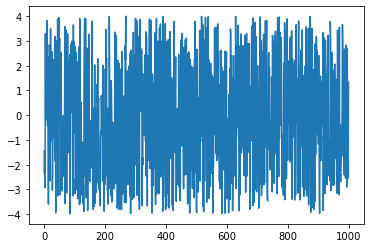

In [125]:
state = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,4], 1.0, 1.0)
delta = ppulse.DirectParameterizedPulse(10, 1000, [-4, 4])
plt.plot(delta.state())
optimize_overlap(state, targetMPS, delta)

[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(1001,)
Current overlap =  0.01686652166267
(1001,)


<ipython-input-101-07e912fdd085>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.016886767774468733
(1001,)
Current overlap =  0.01690703674454405
(1001,)
Current overlap =  0.01695189802155107
(1001,)
Current overlap =  0.016972238444532346
(1001,)
Current overlap =  0.017053715681534628
(1001,)
Current overlap =  0.01712189850708946
(1001,)
Current overlap =  0.01714241773353
(1001,)
Current overlap =  0.01721395568822676
(1001,)
Current overlap =  0.017234576057271626
(1001,)
Current overlap =  0.017317174324042985
(1001,)
Current overlap =  0.017649433130643027
(1001,)
Current overlap =  0.017858272433159742
(1001,)
Current overlap =  0.017879557033812558
(1001,)
Current overlap =  0.017964814928655704
(1001,)
Current overlap =  0.018307755276602684
(1001,)
Current overlap =  0.018469638385923744
(1001,)
Current overlap =  0.01849157187373975
(1001,)
Current overlap =  0.018579428074722043
(1001,)
Current overlap =  0.018629112065020374
(1001,)
Current overlap =  0.01865120083433764
(1001,)
Current overlap =  0.018739678659167414
(1001,)
Cu

(1001,)
Current overlap =  0.03943022500632703
(1001,)
Current overlap =  0.03946813030281645
(1001,)
Current overlap =  0.03957753080317938
(1001,)
Current overlap =  0.039615505018059535
(1001,)
Current overlap =  0.03976755099696926
(1001,)
Current overlap =  0.03999299116341806
(1001,)
Current overlap =  0.04003124491091947
(1001,)
Current overlap =  0.040184409208130635
(1001,)
Current overlap =  0.040799446811768225
(1001,)
Current overlap =  0.04140444323375474
(1001,)
Current overlap =  0.041443735679600385
(1001,)
Current overlap =  0.04160105602507686
(1001,)
Current overlap =  0.041999405248761355
(1001,)
Current overlap =  0.042039111512817764
(1001,)
Current overlap =  0.042083097360090735
(1001,)
Current overlap =  0.04212284789447747
(1001,)
Current overlap =  0.0422501754490997
(1001,)
Current overlap =  0.04228985301298225
(1001,)
Current overlap =  0.042448713059489496
(1001,)
Current overlap =  0.043032145008925576
(1001,)
Current overlap =  0.0430723434522696
(1001,

(1001,)
Current overlap =  0.07106805431319788
(1001,)
Current overlap =  0.07162593930350135
(1001,)
Current overlap =  0.07167670463047168
(1001,)
Current overlap =  0.07170037077250911
(1001,)
Current overlap =  0.07175090253010323
(1001,)
Current overlap =  0.07195314495847784
(1001,)
Current overlap =  0.07218194751672104
(1001,)
Current overlap =  0.07223264930878881
(1001,)
Current overlap =  0.07243557113754301
(1001,)
Current overlap =  0.07248496762885734
(1001,)
Current overlap =  0.07253571239842144
(1001,)
Current overlap =  0.07273880552575857
(1001,)
Current overlap =  0.07321681025122835
(1001,)
Current overlap =  0.07326785370863266
(1001,)
Current overlap =  0.07331886514592201
(1001,)
Current overlap =  0.07352302451986303
(1001,)
Current overlap =  0.07391766164687621
(1001,)
Current overlap =  0.07396876616852882
(1001,)
Current overlap =  0.07417329687176516
(1001,)
Current overlap =  0.07429097662719616
(1001,)
Current overlap =  0.07434219922836198
(1001,)
Curre

(1001,)
Current overlap =  0.10108592948360766
(1001,)
Current overlap =  0.10113720863683458
(1001,)
Current overlap =  0.10129095792752721
(1001,)
Current overlap =  0.10134226240040553
(1001,)
Current overlap =  0.10154754945556999
(1001,)
Current overlap =  0.10236979674954001
(1001,)
Current overlap =  0.10253006126068832
(1001,)
Current overlap =  0.10258157053046489
(1001,)
Current overlap =  0.10263892493470932
(1001,)
Current overlap =  0.10269024407265838
(1001,)
Current overlap =  0.10289558779305043
(1001,)
Current overlap =  0.10308970318907788
(1001,)
Current overlap =  0.10314099344350298
(1001,)
Current overlap =  0.103346220817278
(1001,)
Current overlap =  0.10365965588097764
(1001,)
Current overlap =  0.1037107202343082
(1001,)
Current overlap =  0.10376171329158233
(1001,)
Current overlap =  0.10381270004074745
(1001,)
Current overlap =  0.1040167117275537
(1001,)
Current overlap =  0.10430499582350111
(1001,)
Current overlap =  0.104355735571485
(1001,)
Current ove

Current overlap =  0.12743427206068708
(1001,)
Current overlap =  0.12761685848097906
(1001,)
Current overlap =  0.12808021609835693
(1001,)
Current overlap =  0.12812577186579913
(1001,)
Current overlap =  0.12830802962950805
(1001,)
Current overlap =  0.12900539829777338
(1001,)
Current overlap =  0.129050813094369
(1001,)
Current overlap =  0.1292325073280196
(1001,)
Current overlap =  0.12961404011910785
(1001,)
Current overlap =  0.1296595062675269
(1001,)
Current overlap =  0.1297682047771442
(1001,)
Current overlap =  0.1298135162695513
(1001,)
Current overlap =  0.12985874343799375
(1001,)
Current overlap =  0.13003968690714654
(1001,)
Current overlap =  0.13076401345748254
(1001,)
Current overlap =  0.13093267551059595
(1001,)
Current overlap =  0.130978029914933
(1001,)
Current overlap =  0.13115948211974682
(1001,)
Current overlap =  0.13169539088975715
(1001,)
Current overlap =  0.13174066752668998
(1001,)
Current overlap =  0.13182328062843163
(1001,)
Current overlap =  0.

(1001,)
Current overlap =  0.1517063724421352
(1001,)
Current overlap =  0.15216199650067574
(1001,)
Current overlap =  0.15219864608091338
(1001,)
Current overlap =  0.15228242174096215
(1001,)
Current overlap =  0.15231890232663411
(1001,)
Current overlap =  0.15246484420049966
(1001,)
Current overlap =  0.15252688646652646
(1001,)
Current overlap =  0.15256322701330746
(1001,)
Current overlap =  0.1527086083338229
(1001,)
Current overlap =  0.15275748294606079
(1001,)
Current overlap =  0.1527938402007672
(1001,)
Current overlap =  0.15288253645819844
(1001,)
Current overlap =  0.15291861115435196
(1001,)
Current overlap =  0.1530629292283091
(1001,)
Current overlap =  0.15327559349617165
(1001,)
Current overlap =  0.1533114892393501
(1001,)
Current overlap =  0.15345509189933518
(1001,)
Current overlap =  0.1535841571282049
(1001,)
Current overlap =  0.15361988969990123
(1001,)
Current overlap =  0.15365568882841896
(1001,)
Current overlap =  0.153691115292528
(1001,)
Current overl

(1001,)
Current overlap =  0.1711648931172084
(1001,)
Current overlap =  0.17127481169335043
(1001,)
Current overlap =  0.17171472835211934
(1001,)
Current overlap =  0.17180022286212646
(1001,)
Current overlap =  0.17182757344740063
(1001,)
Current overlap =  0.17188459203908277
(1001,)
Current overlap =  0.17191179899523124
(1001,)
Current overlap =  0.17202064189037874
(1001,)
Current overlap =  0.17245625395324865
(1001,)
Current overlap =  0.17246534501216543
(1001,)
Current overlap =  0.17249245540992603
(1001,)
Current overlap =  0.1726009121599577
(1001,)
Current overlap =  0.1726590601295075
(1001,)
Current overlap =  0.17268593854865472
(1001,)
Current overlap =  0.17275086381077742
(1001,)
Current overlap =  0.17277759954070682
(1001,)
Current overlap =  0.17286862630030259
(1001,)
Current overlap =  0.17289532951988396
(1001,)
Current overlap =  0.1729857592234996
(1001,)
Current overlap =  0.17301226347725196
(1001,)
Current overlap =  0.17311829567051712
(1001,)
Current o

(1001,)
Current overlap =  0.18582865379190652
(1001,)
Current overlap =  0.18600722865510505
(1001,)
Current overlap =  0.18602670022010256
(1001,)
Current overlap =  0.18610459503330723
(1001,)
Current overlap =  0.186266844888443
(1001,)
Current overlap =  0.18628632121042982
(1001,)
Current overlap =  0.18636423505442345
(1001,)
Current overlap =  0.1866760270324259
(1001,)
Current overlap =  0.1867252253106663
(1001,)
Current overlap =  0.18674463295256044
(1001,)
Current overlap =  0.1868222722142997
(1001,)
Current overlap =  0.18713296808038105
(1001,)
Current overlap =  0.1873556919283853
(1001,)
Current overlap =  0.18737497851783882
(1001,)
Current overlap =  0.18745213355880286
(1001,)
Current overlap =  0.18776089237300128
(1001,)
Current overlap =  0.1880390156722484
(1001,)
Current overlap =  0.18805816056739816
(1001,)
Current overlap =  0.18813474891850324
(1001,)
Current overlap =  0.1882844285411373
(1001,)
Current overlap =  0.18830345027595102
(1001,)
Current overl

(1001,)
Current overlap =  0.1996126663442175
(1001,)
Current overlap =  0.1996261371218005
(1001,)
Current overlap =  0.19968002492937315
(1001,)
Current overlap =  0.19986709664089347
(1001,)
Current overlap =  0.19988057723173214
(1001,)
Current overlap =  0.19993450430542362
(1001,)
Current overlap =  0.19996899404393795
(1001,)
Current overlap =  0.19998246361268415
(1001,)
Current overlap =  0.2000363466489546
(1001,)
Current overlap =  0.20004724290600986
(1001,)
Current overlap =  0.2000605091987514
(1001,)
Current overlap =  0.2001135790465631
(1001,)
Current overlap =  0.20032593315021674
(1001,)
Current overlap =  0.20066124928813509
(1001,)
Current overlap =  0.20067452130354793
(1001,)
Current overlap =  0.2006839663011299
(1001,)
Current overlap =  0.20069712895159772
(1001,)
Current overlap =  0.20074978420167205
(1001,)
Current overlap =  0.20078974132742855
(1001,)
Current overlap =  0.2008027404655584
(1001,)
Current overlap =  0.2008547415781342
(1001,)
Current overl

(1001,)
Current overlap =  0.21035824447428345
(1001,)
Current overlap =  0.21036644510384148
(1001,)
Current overlap =  0.21039924978748828
(1001,)
Current overlap =  0.21040795982547436
(1001,)
Current overlap =  0.2104160484003759
(1001,)
Current overlap =  0.210448404855937
(1001,)
Current overlap =  0.21053373239061007
(1001,)
Current overlap =  0.21054167809739202
(1001,)
Current overlap =  0.21057346294154008
(1001,)
Current overlap =  0.21063699189531307
(1001,)
Current overlap =  0.21064485055584445
(1001,)
Current overlap =  0.2106762872293837
(1001,)
Current overlap =  0.21077813020860672
(1001,)
Current overlap =  0.2107859660389334
(1001,)
Current overlap =  0.21081731136015167
(1001,)
Current overlap =  0.21094272462075575
(1001,)
Current overlap =  0.2109801373993031
(1001,)
Current overlap =  0.21098786090741223
(1001,)
Current overlap =  0.21101875691568114
(1001,)
Current overlap =  0.211085512056143
(1001,)
Current overlap =  0.2110931434582493
(1001,)
Current overla

(1001,)
Current overlap =  0.21821193378436896
(1001,)
Current overlap =  0.21823891385449565
(1001,)
Current overlap =  0.21824474887451864
(1001,)
Current overlap =  0.21826809081065693
(1001,)
Current overlap =  0.21833886917461426
(1001,)
Current overlap =  0.21834468007109017
(1001,)
Current overlap =  0.2183679254781303
(1001,)
Current overlap =  0.21838676450361785
(1001,)
Current overlap =  0.21839255028760432
(1001,)
Current overlap =  0.21841569532245478
(1001,)
Current overlap =  0.2185083058374425
(1001,)
Current overlap =  0.21885953700280084
(1001,)
Current overlap =  0.21886526151702823
(1001,)
Current overlap =  0.21888816142023848
(1001,)
Current overlap =  0.21897979056659306
(1001,)
Current overlap =  0.21901311008467664
(1001,)
Current overlap =  0.21901878767946503
(1001,)
Current overlap =  0.2190414999389906
(1001,)
Current overlap =  0.21904976687188188
(1001,)
Current overlap =  0.21905539953055353
(1001,)
Current overlap =  0.2190779320271195
(1001,)
Current o

(1001,)
Current overlap =  0.2248218138277073
(1001,)
Current overlap =  0.22483520145533054
(1001,)
Current overlap =  0.22485805010660448
(1001,)
Current overlap =  0.2248613966503935
(1001,)
Current overlap =  0.22487478359686042
(1001,)
Current overlap =  0.2249283437232144
(1001,)
Current overlap =  0.22499282763339762
(1001,)
Current overlap =  0.22499617545976952
(1001,)
Current overlap =  0.22500956755162993
(1001,)
Current overlap =  0.2250631485005507
(1001,)
Current overlap =  0.22509512971878368
(1001,)
Current overlap =  0.2250984361008811
(1001,)
Current overlap =  0.2251116624142236
(1001,)
Current overlap =  0.2251645802265069
(1001,)
Current overlap =  0.22524550088306422
(1001,)
Current overlap =  0.22524875113062393
(1001,)
Current overlap =  0.22526175290364334
(1001,)
Current overlap =  0.2252994997533185
(1001,)
Current overlap =  0.2253027298235562
(1001,)
Current overlap =  0.225315650905158
(1001,)
Current overlap =  0.22536734804203257
(1001,)
Current overlap 

(1001,)
Current overlap =  0.2296336718292892
(1001,)
Current overlap =  0.22966585843122717
(1001,)
Current overlap =  0.22971992438790498
(1001,)
Current overlap =  0.2297219150888602
(1001,)
Current overlap =  0.22972987843811676
(1001,)
Current overlap =  0.2297617405627968
(1001,)
Current overlap =  0.22986621457198425
(1001,)
Current overlap =  0.22986817660681538
(1001,)
Current overlap =  0.22987602529592863
(1001,)
Current overlap =  0.2299074288498307
(1001,)
Current overlap =  0.22991834721947566
(1001,)
Current overlap =  0.229920303860639
(1001,)
Current overlap =  0.22992260455135324
(1001,)
Current overlap =  0.22992450758350028
(1001,)
Current overlap =  0.2299321202519421
(1001,)
Current overlap =  0.22996257956416064
(1001,)
Current overlap =  0.22996704957321062
(1001,)
Current overlap =  0.22996891545000467
(1001,)
Current overlap =  0.22997637948873512
(1001,)
Current overlap =  0.2299846670037557
(1001,)
Current overlap =  0.22998653001148744
(1001,)
Current overl

(1001,)
Current overlap =  0.2331852546722039
(1001,)
Current overlap =  0.23318995941395285
(1001,)
Current overlap =  0.23320609315250526
(1001,)
Current overlap =  0.2332072527008165
(1001,)
Current overlap =  0.2332118912198488
(1001,)
Current overlap =  0.2332304505086861
(1001,)
Current overlap =  0.23330477107356828
(1001,)
Current overlap =  0.23339322712138152
(1001,)
Current overlap =  0.23339439552465072
(1001,)
Current overlap =  0.23339906947339634
(1001,)
Current overlap =  0.2334071680122697
(1001,)
Current overlap =  0.23340833705236327
(1001,)
Current overlap =  0.23341301354960825
(1001,)
Current overlap =  0.23343172492865316
(1001,)
Current overlap =  0.23349581902149047
(1001,)
Current overlap =  0.23349694999776896
(1001,)
Current overlap =  0.23350147423605103
(1001,)
Current overlap =  0.233519576519945
(1001,)
Current overlap =  0.23359207095155168
(1001,)
Current overlap =  0.23366030606567417
(1001,)
Current overlap =  0.23366143078753562
(1001,)
Current over

(1001,)
Current overlap =  0.23607379822872016
(1001,)
Current overlap =  0.23608059499385015
(1001,)
Current overlap =  0.23608129446536905
(1001,)
Current overlap =  0.2360813281845154
(1001,)
Current overlap =  0.23608202673207912
(1001,)
Current overlap =  0.23608482113332574
(1001,)
Current overlap =  0.23609600211427212
(1001,)
Current overlap =  0.23614078006052422
(1001,)
Current overlap =  0.23624647431498472
(1001,)
Current overlap =  0.23624716972907103
(1001,)
Current overlap =  0.23624995160598936
(1001,)
Current overlap =  0.23626108264287668
(1001,)
Current overlap =  0.23629862533836576
(1001,)
Current overlap =  0.23629931255414394
(1001,)
Current overlap =  0.23630206163961065
(1001,)
Current overlap =  0.2363130615392643
(1001,)
Current overlap =  0.23635711806939683
(1001,)
Current overlap =  0.2364438506601921
(1001,)
Current overlap =  0.2364445192396376
(1001,)
Current overlap =  0.2364471937481366
(1001,)
Current overlap =  0.23645789483373889
(1001,)
Current ov

(1001,)
Current overlap =  0.23897847652535464
(1001,)
Current overlap =  0.23898548444831133
(1001,)
Current overlap =  0.2390135768186454
(1001,)
Current overlap =  0.23909611925291643
(1001,)
Current overlap =  0.23909656566510226
(1001,)
Current overlap =  0.2390983515622589
(1001,)
Current overlap =  0.23910549912537035
(1001,)
Current overlap =  0.23913415296205548
(1001,)
Current overlap =  0.23913461730412944
(1001,)
Current overlap =  0.23913506715931074
(1001,)
Current overlap =  0.23913686682727744
(1001,)
Current overlap =  0.2391440694549288
(1001,)
Current overlap =  0.23917294324942004
(1001,)
Current overlap =  0.23925495504777217
(1001,)
Current overlap =  0.23925541461637223
(1001,)
Current overlap =  0.239257253150015
(1001,)
Current overlap =  0.23926461143229694
(1001,)
Current overlap =  0.23929411091553632
(1001,)
Current overlap =  0.23941316991771577
(1001,)
Current overlap =  0.23946664951732863
(1001,)
Current overlap =  0.23946708133734212
(1001,)
Current ov

(1001,)
Current overlap =  0.2417804222711889
(1001,)
Current overlap =  0.24178470722472123
(1001,)
Current overlap =  0.24180187304819006
(1001,)
Current overlap =  0.2418071872380441
(1001,)
Current overlap =  0.24180745269736995
(1001,)
Current overlap =  0.24180851463705982
(1001,)
Current overlap =  0.24181276403393365
(1001,)
Current overlap =  0.24181795794089175
(1001,)
Current overlap =  0.24181822185036422
(1001,)
Current overlap =  0.24181927759100053
(1001,)
Current overlap =  0.24182350219744664
(1001,)
Current overlap =  0.24184042692194055
(1001,)
Current overlap =  0.2418613206587781
(1001,)
Current overlap =  0.24186155323443895
(1001,)
Current overlap =  0.2418624836147128
(1001,)
Current overlap =  0.24186620637782263
(1001,)
Current overlap =  0.24188111730082978
(1001,)
Current overlap =  0.2418981766500813
(1001,)
Current overlap =  0.2418984012054534
(1001,)
Current overlap =  0.24189929950366135
(1001,)
Current overlap =  0.2419028939240076
(1001,)
Current over

(1001,)
Current overlap =  0.24335847129454208
(1001,)
Current overlap =  0.2433642381501333
(1001,)
Current overlap =  0.24338744329925358
(1001,)
Current overlap =  0.24339940646672586
(1001,)
Current overlap =  0.24339949358837998
(1001,)
Current overlap =  0.24339984210276513
(1001,)
Current overlap =  0.2434012366046477
(1001,)
Current overlap =  0.24340682172140957
(1001,)
Current overlap =  0.24341769755158527
(1001,)
Current overlap =  0.24341778509039902
(1001,)
Current overlap =  0.24341813527365502
(1001,)
Current overlap =  0.2434195364547439
(1001,)
Current overlap =  0.243425148347856
(1001,)
Current overlap =  0.2434477106075554
(1001,)
Current overlap =  0.2434981520036469
(1001,)
Current overlap =  0.24349824082127897
(1001,)
Current overlap =  0.2434985961209593
(1001,)
Current overlap =  0.24350001778608124
(1001,)
Current overlap =  0.24350571190890413
(1001,)
Current overlap =  0.24351772705975291
(1001,)
Current overlap =  0.24351781615573864
(1001,)
Current overl

(1001,)
Current overlap =  0.2441832036468601
(1001,)
Current overlap =  0.24418795210386662
(1001,)
Current overlap =  0.24419116589592454
(1001,)
Current overlap =  0.24419117854329964
(1001,)
Current overlap =  0.2441912291455415
(1001,)
Current overlap =  0.2441914317584052
(1001,)
Current overlap =  0.24419224547235077
(1001,)
Current overlap =  0.24419539149053354
(1001,)
Current overlap =  0.2441954039489703
(1001,)
Current overlap =  0.24419545379550944
(1001,)
Current overlap =  0.24419565338633856
(1001,)
Current overlap =  0.24419645502457032
(1001,)
Current overlap =  0.24419971398698304
(1001,)
Current overlap =  0.24420178055981656
(1001,)
Current overlap =  0.2442017922478751
(1001,)
Current overlap =  0.24420183901296022
(1001,)
Current overlap =  0.2442020262789064
(1001,)
Current overlap =  0.24420277863255824
(1001,)
Current overlap =  0.24420564469683315
(1001,)
Current overlap =  0.24420565642978767
(1001,)
Current overlap =  0.2442057033745025
(1001,)
Current over

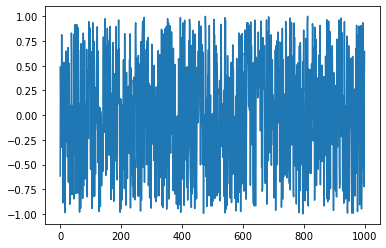

In [126]:
state = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,4], 1.0, 1.0)
delta = ppulse.DirectParameterizedPulse(10, 1000, [-1, 1])
plt.plot(delta.state())
optimize_overlap(state, targetMPS, delta)

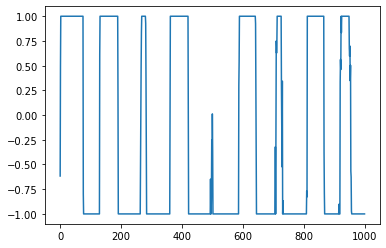

In [127]:
plt.plot(delta.state())

[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(1001,)
Current overlap =  0.015828978042809236
(1001,)


<ipython-input-101-07e912fdd085>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.01584795078192124
(1001,)
Current overlap =  0.015866945031538182
(1001,)
Current overlap =  0.01594303054703604
(1001,)
Current overlap =  0.016249106293060755
(1001,)
Current overlap =  0.016364159540275175
(1001,)
Current overlap =  0.016383633691431164
(1001,)
Current overlap =  0.016461640272596303
(1001,)
Current overlap =  0.0166763783182979
(1001,)
Current overlap =  0.016696185592522002
(1001,)
Current overlap =  0.016775526223408443
(1001,)
Current overlap =  0.01699633757872444
(1001,)
Current overlap =  0.017016359738671376
(1001,)
Current overlap =  0.01709655994181915
(1001,)
Current overlap =  0.01725701650902753
(1001,)
Current overlap =  0.017277324154700773
(1001,)
Current overlap =  0.017330773294109633
(1001,)
Current overlap =  0.017351101746987948
(1001,)
Current overlap =  0.017432528062377727
(1001,)
Current overlap =  0.01776003050038029
(1001,)
Current overlap =  0.017843285909048504
(1001,)
Current overlap =  0.017864161119387215
(1001,)


Current overlap =  0.05836229141900282
(1001,)
Current overlap =  0.058563989009026936
(1001,)
Current overlap =  0.05908724230634092
(1001,)
Current overlap =  0.059137935394041705
(1001,)
Current overlap =  0.059340862758516875
(1001,)
Current overlap =  0.05945873740541778
(1001,)
Current overlap =  0.05950962587190047
(1001,)
Current overlap =  0.05971333441950067
(1001,)
Current overlap =  0.06006787290957926
(1001,)
Current overlap =  0.060118887253865064
(1001,)
Current overlap =  0.06016990944080833
(1001,)
Current overlap =  0.06037415131865347
(1001,)
Current overlap =  0.06043300493379393
(1001,)
Current overlap =  0.06048419651205171
(1001,)
Current overlap =  0.060689115751241376
(1001,)
Current overlap =  0.0615112249947194
(1001,)
Current overlap =  0.061601879571399606
(1001,)
Current overlap =  0.06165366830023056
(1001,)
Current overlap =  0.06186097520194694
(1001,)
Current overlap =  0.06269261984861589
(1001,)
Current overlap =  0.06308923617734422
(1001,)
Current 

(1001,)
Current overlap =  0.12214997277608475
(1001,)
Current overlap =  0.12251358720670796
(1001,)
Current overlap =  0.12258005349707328
(1001,)
Current overlap =  0.12278198583629975
(1001,)
Current overlap =  0.12284827210134491
(1001,)
Current overlap =  0.12311348202684254
(1001,)
Current overlap =  0.12369587943388839
(1001,)
Current overlap =  0.12376213278626257
(1001,)
Current overlap =  0.12402721077096103
(1001,)
Current overlap =  0.125088540416368
(1001,)
Current overlap =  0.12555155573417784
(1001,)
Current overlap =  0.12561799845071994
(1001,)
Current overlap =  0.12562151160353877
(1001,)
Current overlap =  0.12568755339182777
(1001,)
Current overlap =  0.1259517837638152
(1001,)
Current overlap =  0.12636570394922392
(1001,)
Current overlap =  0.1264316021832782
(1001,)
Current overlap =  0.12669525842572293
(1001,)
Current overlap =  0.12775088177457522
(1001,)
Current overlap =  0.12802978341453872
(1001,)
Current overlap =  0.12809589182136874
(1001,)
Current o

(1001,)
Current overlap =  0.19439780005180846
(1001,)
Current overlap =  0.1952705910123619
(1001,)
Current overlap =  0.195338247761118
(1001,)
Current overlap =  0.19554123077660648
(1001,)
Current overlap =  0.19560863675783574
(1001,)
Current overlap =  0.19587830833964257
(1001,)
Current overlap =  0.19695774825726922
(1001,)
Current overlap =  0.19847714958571333
(1001,)
Current overlap =  0.19854473282770668
(1001,)
Current overlap =  0.19864902970909443
(1001,)
Current overlap =  0.19871607956634524
(1001,)
Current overlap =  0.19898432915318467
(1001,)
Current overlap =  0.19934081212224639
(1001,)
Current overlap =  0.19940783030643525
(1001,)
Current overlap =  0.19967595342250058
(1001,)
Current overlap =  0.20074924336451597
(1001,)
Current overlap =  0.20076169485735176
(1001,)
Current overlap =  0.20082888604246818
(1001,)
Current overlap =  0.20109770214058942
(1001,)
Current overlap =  0.20217377967434771
(1001,)
Current overlap =  0.20265826971815382
(1001,)
Current 

(1001,)
Current overlap =  0.2704409035978141
(1001,)
Current overlap =  0.27051249570320557
(1001,)
Current overlap =  0.27079894591522774
(1001,)
Current overlap =  0.2708413435707519
(1001,)
Current overlap =  0.2709127375687814
(1001,)
Current overlap =  0.2709840124830151
(1001,)
Current overlap =  0.2712691936693659
(1001,)
Current overlap =  0.2722041009705361
(1001,)
Current overlap =  0.27227539723430166
(1001,)
Current overlap =  0.27246092087992557
(1001,)
Current overlap =  0.27253214784023827
(1001,)
Current overlap =  0.27281713843727995
(1001,)
Current overlap =  0.27314935564436765
(1001,)
Current overlap =  0.2732205729440037
(1001,)
Current overlap =  0.273505524978753
(1001,)
Current overlap =  0.2739749796697733
(1001,)
Current overlap =  0.2740463156761136
(1001,)
Current overlap =  0.27433174261259924
(1001,)
Current overlap =  0.2750396973820284
(1001,)
Current overlap =  0.275111013311927
(1001,)
Current overlap =  0.2753963601582369
(1001,)
Current overlap =  0

Current overlap =  0.33230102194252764
(1001,)
Current overlap =  0.3323690192866249
(1001,)
Current overlap =  0.3326410535334299
(1001,)
Current overlap =  0.33328332817998774
(1001,)
Current overlap =  0.33335074258007846
(1001,)
Current overlap =  0.3336204428261028
(1001,)
Current overlap =  0.3338806178688065
(1001,)
Current overlap =  0.33394791862642065
(1001,)
Current overlap =  0.33421716410594515
(1001,)
Current overlap =  0.33529481417081175
(1001,)
Current overlap =  0.3370217202689627
(1001,)
Current overlap =  0.33708866377665647
(1001,)
Current overlap =  0.33735647577620065
(1001,)
Current overlap =  0.3384283206106068
(1001,)
Current overlap =  0.3385986117429975
(1001,)
Current overlap =  0.3386655506495668
(1001,)
Current overlap =  0.3389333433116532
(1001,)
Current overlap =  0.3391280073042568
(1001,)
Current overlap =  0.339194269467481
(1001,)
Current overlap =  0.33945935304457353
(1001,)
Current overlap =  0.3396621327668355
(1001,)
Current overlap =  0.33972

(1001,)
Current overlap =  0.3819240961430407
(1001,)
Current overlap =  0.38214598259888594
(1001,)
Current overlap =  0.3829537801176392
(1001,)
Current overlap =  0.38300910369102353
(1001,)
Current overlap =  0.38323040637078654
(1001,)
Current overlap =  0.3835683908158854
(1001,)
Current overlap =  0.38362370656648875
(1001,)
Current overlap =  0.3837448368238751
(1001,)
Current overlap =  0.38379964288801716
(1001,)
Current overlap =  0.3840188753057803
(1001,)
Current overlap =  0.38489593026997126
(1001,)
Current overlap =  0.3865077836977151
(1001,)
Current overlap =  0.38656262875197817
(1001,)
Current overlap =  0.38678201584095834
(1001,)
Current overlap =  0.38737741231598705
(1001,)
Current overlap =  0.38743207535946844
(1001,)
Current overlap =  0.38765073385900795
(1001,)
Current overlap =  0.3885254638305136
(1001,)
Current overlap =  0.3887737250321388
(1001,)
Current overlap =  0.3888280748431759
(1001,)
Current overlap =  0.3888672883419843
(1001,)
Current overlap

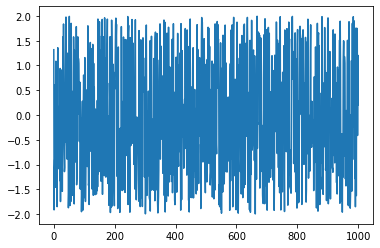

In [128]:
state = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,4], 1.0, 1.0)
delta = ppulse.DirectParameterizedPulse(10, 1000, [-2, 2])
plt.plot(delta.state())
optimize_overlap(state, targetMPS, delta)

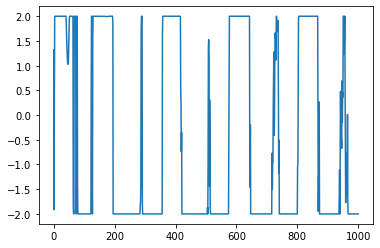

In [129]:
plt.plot(delta.state())


[[-0.5  0.5]
 [-0.5  0.5]
 [-0.5  0.5]
 ...
 [-0.5  0.5]
 [-0.5  0.5]
 [-0.5  0.5]]
(1001,)
Current overlap =  0.014017330039005946
(1001,)


<ipython-input-101-07e912fdd085>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.014034375722608216
(1001,)
Current overlap =  0.014051440961807774
(1001,)
Current overlap =  0.014119800530302016
(1001,)
Current overlap =  0.01439481417123907
(1001,)
Current overlap =  0.014473431209957498
(1001,)
Current overlap =  0.01449098238670514
(1001,)
Current overlap =  0.01456128794272482
(1001,)
Current overlap =  0.014844121187125813
(1001,)
Current overlap =  0.014999828031472276
(1001,)
Current overlap =  0.01501797631477427
(1001,)
Current overlap =  0.015090673129348193
(1001,)
Current overlap =  0.015152023134614863
(1001,)
Current overlap =  0.015170320160314416
(1001,)
Current overlap =  0.01523719453417388
(1001,)
Current overlap =  0.015255537583773623
(1001,)
Current overlap =  0.015284837204246495
(1001,)
Current overlap =  0.015303210678599681
(1001,)
Current overlap =  0.015376808506333842
(1001,)
Current overlap =  0.015452140016695072
(1001,)
Current overlap =  0.015470592904392105
(1001,)
Current overlap =  0.015475865937262547
(1001

Current overlap =  0.026918803164030503
(1001,)
Current overlap =  0.026945924732809805
(1001,)
Current overlap =  0.02700991297030561
(1001,)
Current overlap =  0.02703708545924166
(1001,)
Current overlap =  0.027094829085219253
(1001,)
Current overlap =  0.027121982706886927
(1001,)
Current overlap =  0.027230714996673643
(1001,)
Current overlap =  0.02726603835268644
(1001,)
Current overlap =  0.027293336810628597
(1001,)
Current overlap =  0.027402648797009935
(1001,)
Current overlap =  0.027424166594640212
(1001,)
Current overlap =  0.027451452323774758
(1001,)
Current overlap =  0.027560712653838665
(1001,)
Current overlap =  0.02780538567690894
(1001,)
Current overlap =  0.027832884042497258
(1001,)
Current overlap =  0.027927873097164775
(1001,)
Current overlap =  0.027955468586938995
(1001,)
Current overlap =  0.028009341929760484
(1001,)
Current overlap =  0.02803689996499904
(1001,)
Current overlap =  0.028147248654406088
(1001,)
Current overlap =  0.02859050307383998
(1001,

(1001,)
Current overlap =  0.041210114577833634
(1001,)
Current overlap =  0.041210980853161945
(1001,)
Current overlap =  0.04124264730537472
(1001,)
Current overlap =  0.04129515958661741
(1001,)
Current overlap =  0.041326840308859046
(1001,)
Current overlap =  0.041434983372231816
(1001,)
Current overlap =  0.041466725323350356
(1001,)
Current overlap =  0.041593787834554495
(1001,)
Current overlap =  0.04163900668474242
(1001,)
Current overlap =  0.04167076416616595
(1001,)
Current overlap =  0.041797888404330075
(1001,)
Current overlap =  0.04210172420545515
(1001,)
Current overlap =  0.042133733525006954
(1001,)
Current overlap =  0.04217636132635405
(1001,)
Current overlap =  0.04220830424342825
(1001,)
Current overlap =  0.04232852459664252
(1001,)
Current overlap =  0.04236047258179678
(1001,)
Current overlap =  0.04248835775176689
(1001,)
Current overlap =  0.04287402573091883
(1001,)
Current overlap =  0.04290606891940508
(1001,)
Current overlap =  0.0429070182847597
(1001,

(1001,)
Current overlap =  0.054313652199798
(1001,)
Current overlap =  0.05431545646321607
(1001,)
Current overlap =  0.054345607446747116
(1001,)
Current overlap =  0.054373922947593745
(1001,)
Current overlap =  0.05440405334454582
(1001,)
Current overlap =  0.054524637589256464
(1001,)
Current overlap =  0.0545912243407266
(1001,)
Current overlap =  0.054621393530886325
(1001,)
Current overlap =  0.054636425665431365
(1001,)
Current overlap =  0.05466660634719393
(1001,)
Current overlap =  0.054787391597898354
(1001,)
Current overlap =  0.0548355952172641
(1001,)
Current overlap =  0.05486578818157685
(1001,)
Current overlap =  0.05498662220852172
(1001,)
Current overlap =  0.05507750514356153
(1001,)
Current overlap =  0.05510779616160592
(1001,)
Current overlap =  0.05516918990326012
(1001,)
Current overlap =  0.05519937174918142
(1001,)
Current overlap =  0.05522948614587715
(1001,)
Current overlap =  0.055259547452726834
(1001,)
Current overlap =  0.05537985354103491
(1001,)
Cu

Current overlap =  0.0663450171506344
(1001,)
Current overlap =  0.06637030483877578
(1001,)
Current overlap =  0.06647149241123963
(1001,)
Current overlap =  0.06648715530395784
(1001,)
Current overlap =  0.06651228568578423
(1001,)
Current overlap =  0.06653737609304547
(1001,)
Current overlap =  0.06659628128211828
(1001,)
Current overlap =  0.06662132699553461
(1001,)
Current overlap =  0.06672154581525676
(1001,)
Current overlap =  0.06674560907231637
(1001,)
Current overlap =  0.06677068154349959
(1001,)
Current overlap =  0.06679572896404051
(1001,)
Current overlap =  0.06689595446346139
(1001,)
Current overlap =  0.06719275202627646
(1001,)
Current overlap =  0.06721788301567692
(1001,)
Current overlap =  0.06731844273822904
(1001,)
Current overlap =  0.0675000385291795
(1001,)
Current overlap =  0.06752524848894269
(1001,)
Current overlap =  0.06762380885414301
(1001,)
Current overlap =  0.067648962559046
(1001,)
Current overlap =  0.06770515507276605
(1001,)
Current overlap =

(1001,)
Current overlap =  0.07594452896879234
(1001,)
Current overlap =  0.07602311922488768
(1001,)
Current overlap =  0.07604201716130099
(1001,)
Current overlap =  0.07611762857879442
(1001,)
Current overlap =  0.07641482150323552
(1001,)
Current overlap =  0.07643368755362102
(1001,)
Current overlap =  0.07645255325033318
(1001,)
Current overlap =  0.07652803551129923
(1001,)
Current overlap =  0.07675047830675565
(1001,)
Current overlap =  0.07676928264102403
(1001,)
Current overlap =  0.07677421111359599
(1001,)
Current overlap =  0.07679290524061147
(1001,)
Current overlap =  0.07679457778080741
(1001,)
Current overlap =  0.07681308736426774
(1001,)
Current overlap =  0.07687682125587711
(1001,)
Current overlap =  0.07689532150819961
(1001,)
Current overlap =  0.0769618942770199
(1001,)
Current overlap =  0.0769803876815268
(1001,)
Current overlap =  0.07699333486837166
(1001,)
Current overlap =  0.077011601512528
(1001,)
Current overlap =  0.0770846862396204
(1001,)
Current ov

Current overlap =  0.083807447436048
(1001,)
Current overlap =  0.08383227424309196
(1001,)
Current overlap =  0.0838454604317348
(1001,)
Current overlap =  0.08385862887169787
(1001,)
Current overlap =  0.08386673096250431
(1001,)
Current overlap =  0.08387985534922045
(1001,)
Current overlap =  0.08388146148385589
(1001,)
Current overlap =  0.0838945020342518
(1001,)
Current overlap =  0.08390061741552032
(1001,)
Current overlap =  0.08391362938614634
(1001,)
Current overlap =  0.08393163911606669
(1001,)
Current overlap =  0.08394462316379393
(1001,)
Current overlap =  0.08399656794979789
(1001,)
Current overlap =  0.08402904005490087
(1001,)
Current overlap =  0.08404197586684357
(1001,)
Current overlap =  0.08404409312433206
(1001,)
Current overlap =  0.08405693395059469
(1001,)
Current overlap =  0.08410830565286878
(1001,)
Current overlap =  0.08412832896057637
(1001,)
Current overlap =  0.08414113887040259
(1001,)
Current overlap =  0.08419238691183245
(1001,)
Current overlap =

Current overlap =  0.08960333330102245
(1001,)
Current overlap =  0.08961270948961146
(1001,)
Current overlap =  0.08965021833867293
(1001,)
Current overlap =  0.089679193694274
(1001,)
Current overlap =  0.08968845270753989
(1001,)
Current overlap =  0.08969319655512227
(1001,)
Current overlap =  0.08970244758267007
(1001,)
Current overlap =  0.08971261001152615
(1001,)
Current overlap =  0.08972185068813401
(1001,)
Current overlap =  0.08973634877025784
(1001,)
Current overlap =  0.08974554437565288
(1001,)
Current overlap =  0.08978233072953959
(1001,)
Current overlap =  0.08983877857016136
(1001,)
Current overlap =  0.08984787816208586
(1001,)
Current overlap =  0.08985695841614173
(1001,)
Current overlap =  0.0898808368663058
(1001,)
Current overlap =  0.08988988724929955
(1001,)
Current overlap =  0.08989364886460181
(1001,)
Current overlap =  0.08990258817832628
(1001,)
Current overlap =  0.08991134912952072
(1001,)
Current overlap =  0.08992008286318874
(1001,)
Current overlap 

KeyboardInterrupt: 

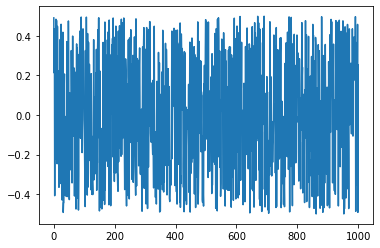

In [130]:
state = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,4], 1.0, 1.0)
delta = ppulse.DirectParameterizedPulse(10, 1000, [-0.5, 0.5])
plt.plot(delta.state())
optimize_overlap(state, targetMPS, delta)
plt.plot(delta.state())

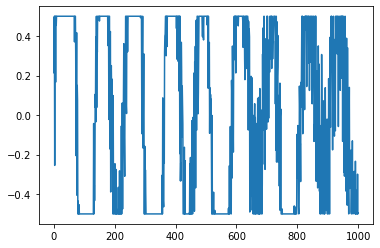

In [131]:
plt.plot(delta.state())